In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
dta = pd.read_csv("fall-msd-control.csv")

In [61]:
dta.head()

,Unnamed: 0,store_name,store_id,display_extra_info,display_id,last_scanned_datetime,name,previous_post_scan_num_facings,max_slots,payoff,product_id
0,0,TARGET #1814,bf6056f2-b419-457b-991b-1429631ad325,Self Checkout Monster cooler,20f144bc-f634-498f-979b-353d06b83fee,2022-11-18 16:43:00+00:00,Monster Energy Original 16oz Can,6.0,23.0,14.24735,086d252c-c27e-40f3-bc96-19d03948cec0
1,1,TARGET #1814,bf6056f2-b419-457b-991b-1429631ad325,Self Checkout Monster cooler,20f144bc-f634-498f-979b-353d06b83fee,2022-11-18 16:43:00+00:00,Monster Energy Mango Loco 16oz Can,3.0,23.0,0.00000,e02df9d1-9439-4998-8981-be030a7b04e3
2,2,TARGET #1814,bf6056f2-b419-457b-991b-1429631ad325,Self Checkout Monster cooler,20f144bc-f634-498f-979b-353d06b83fee,2022-11-18 16:43:00+00:00,Monster Energy Pipeline 16oz Can,3.0,23.0,0.00000,a7bebac9-5fbe-4d3f-a95b-225aba73482c
3,3,TARGET #1814,bf6056f2-b419-457b-991b-1429631ad325,Checkstand 1,fed6bddf-aad9-4b5f-bc96-929208c29b5b,2022-11-18 17:03:20+00:00,"DASANI Purified Water Bottle, 20 fl oz",3.0,44.0,0.00000,9d5d2259-6fa3-4d29-8cde-fe6b1498cd7d
4,4,TARGET #1814,bf6056f2-b419-457b-991b-1429631ad325,Checkstand 1,fed6bddf-aad9-4b5f-bc96-929208c29b5b,2022-11-18 17:03:20+00:00,Bodyarmor Fruit Punch 16oz Bottle,1.0,44.0,0.00000,0c13a85a-c312-442c-9f69-76c8b1a1625d


In [62]:
dta['cooler_day'] = dta['display_id'] + "_" + dta['last_scanned_datetime']

In [63]:
tol = 95.0
min_count = 3

In [64]:
dta = dta[dta['payoff'] > 0.0]
np.percentile(dta['payoff'], q=[tol])
dta = dta[dta['payoff'] < np.percentile(dta['payoff'], q=[tol])[0]]


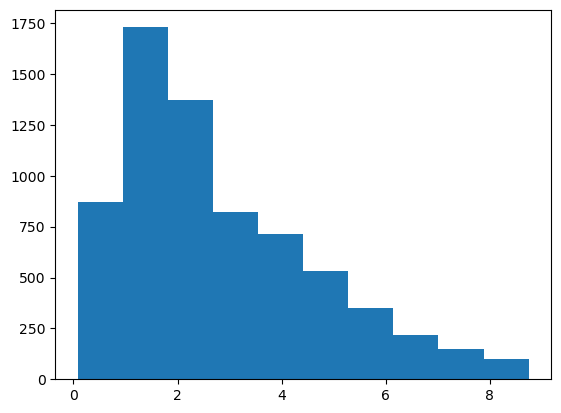

In [65]:
plt.hist(dta.payoff)
plt.show()

In [66]:
prod_counts = dta[['cooler_day' , 'product_id']].groupby('cooler_day').count().sort_values("product_id")

In [75]:
prod_counts = prod_counts[prod_counts['product_id'] > min_count]

In [76]:
prod_counts.reset_index(inplace=True)

In [77]:
prod_counts.shape

(806, 3)

In [78]:
dta.shape

(6857, 12)

In [79]:
prod_counts.cooler_day.values

array(['a1b8f72a-04ef-41d4-adf5-64c4a35d9e76_2022-11-02 17:03:00+00:00',
       '3e6494a6-1a8c-4dbf-8342-7a4e9627cce0_2022-11-05 18:45:49+00:00',
       '3b98c3a5-270f-468c-a898-eddf642a0156_2022-10-05 20:04:39+00:00',
       'b06c3ed6-f18b-487f-9729-7b2fbe731883_2022-11-04 14:40:14+00:00',
       '1f7370e7-724c-48d6-b450-d8f3f5cf501e_2022-10-20 16:04:36+00:00',
       'b06c3ed6-f18b-487f-9729-7b2fbe731883_2022-11-07 22:43:31+00:00',
       'fd1d3677-12e6-499a-a19b-731497647bd6_2022-09-30 14:12:26+00:00',
       'af36be9d-7268-466a-953a-ebbc8bc476e2_2022-09-22 20:42:41+00:00',
       'a1b8f72a-04ef-41d4-adf5-64c4a35d9e76_2022-10-31 15:03:38+00:00',
       '3e6494a6-1a8c-4dbf-8342-7a4e9627cce0_2022-11-07 20:24:06+00:00',
       'a1b8f72a-04ef-41d4-adf5-64c4a35d9e76_2022-10-30 16:27:12+00:00',
       '1f7370e7-724c-48d6-b450-d8f3f5cf501e_2022-11-11 12:18:36+00:00',
       'b300ee40-d383-42d8-aab3-ebea04dd0954_2022-10-08 20:09:07+00:00',
       'b300ee40-d383-42d8-aab3-ebea04dd0954_2022-1

In [80]:
dta = dta[dta['cooler_day'].isin(prod_counts.cooler_day.values)]

In [81]:
dta.shape

(4978, 12)

In [82]:
dta[['cooler_day' , 'product_id']].groupby('cooler_day').count().sort_values("product_id")

,product_id
cooler_day,
87a3df22-36db-43d0-a8b7-11f472d6cf6c_2022-10-08 13:22:48+00:00,4
93d35f96-d98e-444a-b7be-71ff523ae792_2022-10-30 15:56:05+00:00,4
93d35f96-d98e-444a-b7be-71ff523ae792_2022-10-25 13:31:21+00:00,4
93d35f96-d98e-444a-b7be-71ff523ae792_2022-10-24 12:16:38+00:00,4
93d35f96-d98e-444a-b7be-71ff523ae792_2022-10-20 15:21:04+00:00,4
...,...
40e1387b-4c1a-48d9-8572-0cc94d01e6e5_2022-09-22 22:39:52+00:00,14
fe8f0364-3bd9-45d8-bbe9-f8eb2b22f83b_2022-10-17 20:30:36+00:00,14
1f7370e7-724c-48d6-b450-d8f3f5cf501e_2022-10-23 15:44:34+00:00,14


In [84]:
dta.to_csv("fall-msd-control_clean.csv")